<a href="https://colab.research.google.com/github/slvrch/analisisdata/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Silvia Rachmawati]
- **Email:** [slvrachma@gmail.com]
- **ID Dicoding:** [slvrach]

## Menentukan Pertanyaan Analisis

- Bagaimana perbandingan rata-rata tingkat polutan PM2.5 dan PM10 di setiap stasiun?

- Bagaimana distribusi polutan NO2 dalam sehari di setiap stasiun?

- Bagaimana variabel suhu, hujan, tekanan udara, titik embun dan angin memengaruhi tingkat polusi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Memuat tabel **airqualityAotizhongxin**

In [2]:
airqualityAotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
airqualityAotizhongxin_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


Memuat tabel **airqualityChangping**

In [3]:
airqualityChangping_df = pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv")
airqualityChangping_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


Memuat tabel **airqualityDingling**

In [4]:
airqualityDingling_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv")
airqualityDingling_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


Memuat tabel **airqualityDongsi**

In [5]:
airqualityDongsi_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv")
airqualityDongsi_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4,Dongsi
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Dongsi
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1,Dongsi
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Dongsi


Memuat tabel **airqualityGuanyuan**

In [6]:
airqualityGuanyuan_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv")
airqualityGuanyuan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


Memuat tabel **airqualityGucheng**

In [7]:
airqualityGucheng_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv")
airqualityGucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Memuat tabel **airqualityHuairou**

In [8]:
airqualityHuairou_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv")
airqualityHuairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


Memuat tabel **airqualityNongzhanguan**

In [9]:
airqualityNongzhanguan_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
airqualityNongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


Memuat tabel **airqualityShunyi**

In [10]:
airqualityShunyi_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv")
airqualityShunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


Memuat tabel **airqualityTiantan**

In [11]:
airqualityTiantan_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv")
airqualityTiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


Memuat tabel **airqualityWanliu**

In [12]:
airqualityWanliu_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv")
airqualityWanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


Memuat tabel **airqualityWanshouxigong**

In [13]:
airqualityWanshouxigong_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
airqualityWanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Setiap tabel memiliki jumlah 18 kolom
- Setiap tabel terdiri dari beberapa kandungan udara, tingkat hujan, suhu, dan lain-lain setiap bulan dengan waktu yang berbeda-beda.
- Setiap tabel memiliki kolom numerik dan kategorik

### Assessing Data

Menilai tabel **airqualityAotizhongxin**

In [14]:
airqualityAotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


mengecek missing values pada jumlah data pada kolom

In [15]:
airqualityWanshouxigong_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


Meriksa duplikat data

In [16]:
print("Jumlah duplikasi:", airqualityAotizhongxin_df.duplicated().sum())

Jumlah duplikasi: 0


Memeriksa parameter statistik

In [17]:
airqualityAotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [18]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikAotizhongxin = airqualityAotizhongxin_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikAotizhongxin:
    dataset = airqualityAotizhongxin_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataset.dropna(), 25), np.percentile(dataset.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliers = dataset[(dataset < minimum) | (dataset > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1624
120      284.0
121      272.0
140      254.0
141      266.0
142      254.0
         ...  
34755    277.0
34756    284.0
34757    275.0
34758    270.0
34759    270.0
Name: PM2.5, Length: 1624, dtype: float64
Kolom: PM10
Jumlah outlier: 1080
139      338.0
140      396.0
141      380.0
142      335.0
143      360.0
         ...  
34468    351.0
34469    343.0
34470    359.0
34471    331.0
34481    348.0
Name: PM10, Length: 1080, dtype: float64
Kolom: SO2
Jumlah outlier: 3054
42       50.0
43       50.0
44       54.0
45       72.0
46       84.0
         ... 
34833    50.0
34834    66.0
34835    71.0
34836    67.0
34837    61.0
Nam

Menilai tabel **airqualityChangping**

In [19]:
airqualityChangping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Memeriksa jumlah missing value pada kolom

In [20]:
airqualityChangping_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


Memeriksa duplikasi data

In [21]:
print("Jumlah duplikat:",airqualityChangping_df.duplicated().sum())

Jumlah duplikat: 0


Memeriksa parameter statistik

In [22]:
airqualityChangping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [23]:
#Pilih hanya kolom numerik
kolom_numerikChangping = airqualityAotizhongxin_df.select_dtypes(include=['number']).columns

# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikChangping:
    dataChangping = airqualityAotizhongxin_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataChangping.dropna(), 25), np.percentile(dataChangping.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliers = dataChangping[(dataChangping < minimum) | (dataChangping > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1624
120      284.0
121      272.0
140      254.0
141      266.0
142      254.0
         ...  
34755    277.0
34756    284.0
34757    275.0
34758    270.0
34759    270.0
Name: PM2.5, Length: 1624, dtype: float64
Kolom: PM10
Jumlah outlier: 1080
139      338.0
140      396.0
141      380.0
142      335.0
143      360.0
         ...  
34468    351.0
34469    343.0
34470    359.0
34471    331.0
34481    348.0
Name: PM10, Length: 1080, dtype: float64
Kolom: SO2
Jumlah outlier: 3054
42       50.0
43       50.0
44       54.0
45       72.0
46       84.0
         ... 
34833    50.0
34834    66.0
34835    71.0
34836    67.0
34837    61.0
Nam

**Menilai tabel airqualityDingling**

In [24]:
airqualityDingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value

In [25]:
airqualityDingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


memeriksa duplikasi

In [26]:
print("Jumlah duplikasi:", airqualityDingling_df.duplicated().sum())

Jumlah duplikasi: 0


memeriksa ringkasan parameter statistik

In [27]:
airqualityDingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [28]:
#Pilih hanya kolom numerik
kolom_numerikDingling = airqualityDingling_df.select_dtypes(include=['number']).columns

# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikDingling:
    dataDingling = airqualityAotizhongxin_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataDingling.dropna(), 25), np.percentile(dataDingling.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliers = dataDingling[(dataDingling < minimum) | (dataDingling > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1624
120      284.0
121      272.0
140      254.0
141      266.0
142      254.0
         ...  
34755    277.0
34756    284.0
34757    275.0
34758    270.0
34759    270.0
Name: PM2.5, Length: 1624, dtype: float64
Kolom: PM10
Jumlah outlier: 1080
139      338.0
140      396.0
141      380.0
142      335.0
143      360.0
         ...  
34468    351.0
34469    343.0
34470    359.0
34471    331.0
34481    348.0
Name: PM10, Length: 1080, dtype: float64
Kolom: SO2
Jumlah outlier: 3054
42       50.0
43       50.0
44       54.0
45       72.0
46       84.0
         ... 
34833    50.0
34834    66.0
34835    71.0
34836    67.0
34837    61.0
Nam

Menilai tabel **airqualityDongsi**

In [29]:
airqualityDongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value data

In [30]:
airqualityDongsi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


memeriksa duplikasi

In [31]:
print("Jumlah duplikat:", airqualityDongsi_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa ringkasan parameter statistik

In [32]:
airqualityDongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [33]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikDongsi = airqualityDongsi_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikDongsi:
    dataDongsi = airqualityDongsi_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataDongsi.dropna(), 25), np.percentile(dataDongsi.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersDongsi = dataDongsi[(dataDongsi < minimum) | (dataDongsi > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersDongsi)}")
    print(outliersDongsi)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1622
152      292.0
153      300.0
154      289.0
156      288.0
157      312.0
         ...  
34755    275.0
34756    278.0
34757    268.0
34758    273.0
34759    265.0
Name: PM2.5, Length: 1622, dtype: float64
Kolom: PM10
Jumlah outlier: 1335
153      337.0
156      324.0
159      322.0
165      349.0
166      552.0
         ...  
34656    383.0
34657    399.0
34658    358.0
34841    350.0
34844    333.0
Name: PM10, Length: 1335, dtype: float64
Kolom: SO2
Jumlah outlier: 2606
45       61.0
46       71.0
47       73.0
48       70.0
49       65.0
         ... 
34752    56.0
34753    58.0
34755    55.0
34835    57.0
34836    56.0
Nam

Menilai tabel **airqualityGuanyuan**

In [34]:
airqualityGuanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value

In [35]:
airqualityGuanyuan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


memeriksa jumlah duplikat data

In [36]:
print("Jumlah duplikat:", airqualityGuanyuan_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa ringkasan parameter statistik

In [37]:
airqualityGuanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [38]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikGuanyuan = airqualityGuanyuan_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikGuanyuan:
    dataGuanyuan = airqualityGuanyuan_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataGuanyuan.dropna(), 25), np.percentile(dataGuanyuan.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersGuanyuan = dataGuanyuan[(dataGuanyuan < minimum) | (dataGuanyuan > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersGuanyuan)}")
    print(outliersGuanyuan)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1504
153      262.0
154      278.0
155      280.0
156      289.0
157      297.0
         ...  
34752    267.0
34753    262.0
34754    262.0
34755    259.0
34756    260.0
Name: PM2.5, Length: 1504, dtype: float64
Kolom: PM10
Jumlah outlier: 1186
153      342.0
154      333.0
156      328.0
157      344.0
166      375.0
         ...  
34480    380.0
34481    362.0
34482    391.0
34483    341.0
34654    415.0
Name: PM10, Length: 1186, dtype: float64
Kolom: SO2
Jumlah outlier: 3020
42       52.0
43       56.0
44       57.0
45       57.0
46       51.0
         ... 
34752    60.0
34753    52.0
34834    53.0
34835    54.0
34836    51.0
Nam

Menilai tabel **airqualityGuacheng**

In [39]:
airqualityGucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value pada kolom

In [40]:
airqualityGucheng_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


memeriksa jumlah duplikat data

In [41]:
print("Jumlah duplikat:", airqualityGucheng_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa parameter statistik

In [42]:
airqualityGucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


In [43]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikGucheng = airqualityGucheng_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikGucheng:
    dataGucheng = airqualityGucheng_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataGucheng.dropna(), 25), np.percentile(dataGucheng.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersGucheng = dataGucheng[(dataGucheng < minimum) | (dataGucheng > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersGucheng)}")
    print(outliersGucheng)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1584
141      287.0
142      292.0
143      272.0
144      279.0
145      284.0
         ...  
34755    271.0
34756    262.0
34757    264.0
34758    258.0
34759    257.0
Name: PM2.5, Length: 1584, dtype: float64
Kolom: PM10
Jumlah outlier: 884
144      373.0
145      391.0
146      375.0
155      362.0
156      399.0
         ...  
34480    368.0
34481    430.0
34482    442.0
34653    385.0
34654    383.0
Name: PM10, Length: 884, dtype: float64
Kolom: SO2
Jumlah outlier: 2639
41       50.0
42       50.0
43       62.0
44       66.0
45       67.0
         ... 
34825    53.0
34826    51.0
34834    48.0
34836    50.0
34837    52.0
Name:

Menilai tabel **airqualityHuairou**

In [44]:
airqualityHuairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value

In [45]:
airqualityHuairou_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


memeriksa jumlah duplikasi data

In [46]:
print("Jumlah duplikat:", airqualityHuairou_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa parameter statistik

In [47]:
airqualityHuairou_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [48]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikHuairou = airqualityHuairou_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikHuairou:
    dataHuairou = airqualityHuairou_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataHuairou.dropna(), 25), np.percentile(dataHuairou.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersHuairou = dataHuairou[(dataHuairou < minimum) | (dataHuairou > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersHuairou)}")
    print(outliersHuairou)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1626
141      267.0
142      288.0
143      245.0
144      240.0
145      231.0
         ...  
34755    227.0
34756    222.0
34757    222.0
34758    226.0
34759    227.0
Name: PM2.5, Length: 1626, dtype: float64
Kolom: PM10
Jumlah outlier: 1067
139      316.0
140      340.0
141      354.0
142      354.0
160      336.0
         ...  
34475    319.0
34476    308.0
34482    319.0
34483    341.0
34484    346.0
Name: PM10, Length: 1067, dtype: float64
Kolom: SO2
Jumlah outlier: 3359
6        33.0
8        34.0
9        50.0
23       50.0
24       44.0
         ... 
34754    33.0
34834    36.0
34835    34.0
34836    34.0
34882    33.0
Nam

Menilai tabel **airqualityNongzhanguan**

In [49]:
airqualityNongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value

In [50]:
airqualityNongzhanguan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


memeriksa jumlah duplikat

In [51]:
print("Jumlah duplikat:", airqualityNongzhanguan_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa parameter statistik

In [52]:
airqualityNongzhanguan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [53]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikNongzhanguan = airqualityNongzhanguan_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikNongzhanguan:
    dataNongzhanguan = airqualityNongzhanguan_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataNongzhanguan.dropna(), 25), np.percentile(dataNongzhanguan.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersNongzhanguan = dataNongzhanguan[(dataNongzhanguan < minimum) | (dataNongzhanguan > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersNongzhanguan)}")
    print(outliersNongzhanguan)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1765
149      291.0
150      314.0
151      318.0
152      300.0
153      281.0
         ...  
34755    272.0
34756    272.0
34757    273.0
34758    274.0
34759    259.0
Name: PM2.5, Length: 1765, dtype: float64
Kolom: PM10
Jumlah outlier: 1379
149      321.0
150      337.0
151      331.0
156      341.0
157      396.0
         ...  
34655    413.0
34656    373.0
34657    386.0
34658    350.0
35028    697.0
Name: PM10, Length: 1379, dtype: float64
Kolom: SO2
Jumlah outlier: 3019
44       54.0
45       68.0
46       73.0
47       78.0
48       86.0
         ... 
34750    54.0
34751    59.0
34752    59.0
34754    57.0
34835    56.0
Nam

Menilai tabel **airqualityShunyi**

In [54]:
airqualityShunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value

In [55]:
airqualityShunyi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


memeriksa jumlah duplikat

In [56]:
print("Jumlah duplikat:", airqualityShunyi_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa parameter statistik

In [57]:
airqualityShunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [58]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikShunyi = airqualityShunyi_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikShunyi:
    dataShunyi = airqualityShunyi_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataShunyi.dropna(), 25), np.percentile(dataShunyi.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersShunyi = dataShunyi[(dataShunyi < minimum) | (dataShunyi > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersShunyi)}")
    print(outliersShunyi)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1501
144      299.0
145      312.0
146      275.0
147      278.0
148      255.0
         ...  
34750    272.0
34751    256.0
34752    254.0
34753    272.0
34754    253.0
Name: PM2.5, Length: 1501, dtype: float64
Kolom: PM10
Jumlah outlier: 1180
144      312.0
145      320.0
146      308.0
147      305.0
158      335.0
         ...  
34467    302.0
34482    306.0
34483    320.0
34729    301.0
34730    311.0
Name: PM10, Length: 1180, dtype: float64
Kolom: SO2
Jumlah outlier: 3011
45       53.0
46       46.0
47       70.0
48       45.0
49       40.0
         ... 
34835    46.0
34881    42.0
34882    45.0
34884    51.0
35027    44.0
Nam

Menilai tabel **airqualityTiantan**

In [59]:
airqualityTiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value

In [60]:
airqualityTiantan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


memeriksa jumlah duplikat

In [61]:
print("Jumlah duplikat:", airqualityTiantan_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa parameter statistik

In [62]:
airqualityTiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [63]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikTiantan = airqualityTiantan_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikTiantan:
    dataTiantan = airqualityTiantan_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataTiantan.dropna(), 25), np.percentile(dataTiantan.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersTiantan = dataTiantan[(dataTiantan < minimum) | (dataTiantan > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersTiantan)}")
    print(outliersTiantan)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1592
146      259.0
154      296.0
155      366.0
156      390.0
157      386.0
         ...  
34754    262.0
34755    252.0
34757    260.0
34758    252.0
34759    251.0
Name: PM2.5, Length: 1592, dtype: float64
Kolom: PM10
Jumlah outlier: 1324
154      314.0
155      409.0
156      412.0
157      392.0
159      326.0
         ...  
34483    393.0
34484    358.0
34654    336.0
34655    375.0
34656    416.0
Name: PM10, Length: 1324, dtype: float64
Kolom: SO2
Jumlah outlier: 3135
39       48.0
40       52.0
41       49.0
42       52.0
43       43.0
         ... 
34836    55.0
34837    46.0
34838    40.0
35028    39.0
35029    44.0
Nam

Menilai tabel **airqualityWanliu**

In [64]:
airqualityWanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing value

In [65]:
airqualityWanliu_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


memeriksa jumlah duplikasi

In [66]:
print("Jumlah duplikat:", airqualityWanliu_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa parameter statistik

In [67]:
airqualityWanliu_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [68]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikWanliu = airqualityWanliu_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikWanliu:
    dataWanliu = airqualityWanliu_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataWanliu.dropna(), 25), np.percentile(dataWanliu.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersWanliu = dataWanliu[(dataWanliu < minimum) | (dataWanliu > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersWanliu)}")
    print(outliersWanliu)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1566
118      270.0
119      268.0
137      259.0
142      266.0
143      266.0
         ...  
34752    266.0
34753    264.0
34754    269.0
34755    261.0
34757    256.0
Name: PM2.5, Length: 1566, dtype: float64
Kolom: PM10
Jumlah outlier: 1221
118      343.0
119      328.0
137      330.0
140      332.0
143      328.0
         ...  
34462    370.0
34463    340.0
34481    331.0
34482    361.0
34483    331.0
Name: PM10, Length: 1221, dtype: float64
Kolom: SO2
Jumlah outlier: 2870
44       55.0
45       68.0
46       65.0
47       62.0
48       69.0
         ... 
34833    57.0
34834    66.0
34835    66.0
34836    63.0
34837    59.0
Nam

Menilai tabel **airqualityWanshouxigong**

In [69]:
airqualityWanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


memeriksa missing values

In [70]:
airqualityWanshouxigong_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


memeriksa jumlah duplikat

In [71]:
print("Jumlah duplikat:", airqualityWanshouxigong_df.duplicated().sum())

Jumlah duplikat: 0


memeriksa parameter statistik

In [72]:
airqualityWanshouxigong_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Mengecek data outlier untuk setiap kolom menggunakan IQR

In [73]:
#Dibuat variabel yang hanya bernilai kolom numerik
kolom_numerikWanshouxigong = airqualityWanshouxigong_df.select_dtypes(include='number').columns
# Selanjutnya, menentunkan outlier untuk setiap kolom numerik
for kolom in kolom_numerikWanshouxigong:
    dataWanshouxigong = airqualityWanshouxigong_df[kolom]

    # Hitung Q1, Q3, dan IQR
    q25, q75 = np.percentile(dataWanshouxigong.dropna(), 25), np.percentile(dataWanshouxigong.dropna(), 75)  # Drop NA untuk menghindari error
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    # Identifikasi outlier
    outliersWanshouxigong = dataWanshouxigong[(dataWanshouxigong < minimum) | (dataWanshouxigong > maximum)]

    # Output hasil
    print(f"Kolom: {kolom}")
    print(f"Jumlah outlier: {len(outliersWanshouxigong)}")
    print(outliersWanshouxigong)

Kolom: No
Jumlah outlier: 0
Series([], Name: No, dtype: int64)
Kolom: year
Jumlah outlier: 0
Series([], Name: year, dtype: int64)
Kolom: month
Jumlah outlier: 0
Series([], Name: month, dtype: int64)
Kolom: day
Jumlah outlier: 0
Series([], Name: day, dtype: int64)
Kolom: hour
Jumlah outlier: 0
Series([], Name: hour, dtype: int64)
Kolom: PM2.5
Jumlah outlier: 1727
144      258.0
145      270.0
146      280.0
147      264.0
153      262.0
         ...  
34755    266.0
34756    264.0
34757    262.0
34758    261.0
34759    256.0
Name: PM2.5, Length: 1727, dtype: float64
Kolom: PM10
Jumlah outlier: 1311
154      349.0
155      407.0
156      454.0
157      400.0
158      336.0
         ...  
34483    409.0
34484    389.0
34654    369.0
34655    410.0
34656    388.0
Name: PM10, Length: 1311, dtype: float64
Kolom: SO2
Jumlah outlier: 3191
42       51.0
43       53.0
44       63.0
45       72.0
46       82.0
         ... 
34804    49.0
34833    51.0
34834    56.0
34835    55.0
34836    52.0
Nam

**Insight:**
- Setiap tabel memiliki jumlah data 35064
- Setiap tabel memiliki tipe data yaitu, float64(11), int64(5), dan object(2)
- Setiap tabel memiliki missing value di dua belas kolom yang sama dengan jumlah variatif
- Missing value di dua kolom diantaranya numerik dan kategorik
- Setiap tabel memiliki outliers di delapan kolom yang sama dengan jumlah variatif
- Setiap tabel memiliki iqr yang berbeda-beda

### Cleaning Data

Berdasarkan hasil proses assessing data, diketahui bahwa setiap tabel terdapat dua masalah yang terindikasi yaitu missing value pada 12 kolom dan outliers delapan kolom. Selanjutnya, akan membersihkan masalah tersebut.


1. Membersihkan tabel **airqualityAotizhongxin**



* Missing value

Menangani missing value type data numerik

In [74]:
airqualityAotizhongxin_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
airqualityAotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [75]:
#Mengecek total missing value setiap kolom
missingAotizhongxin = airqualityAotizhongxin_df.isnull().sum()
missingAotizhongxin[missingAotizhongxin > 0]

,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776
O3,1719
TEMP,20
PRES,20
DEWP,20
RAIN,20


In [76]:
#Pisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessAotizhongxin = missingAotizhongxin[missingAotizhongxin < 1000].index
overAotizhongxin = missingAotizhongxin[missingAotizhongxin >= 1000].index

In [77]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaAotizhongxin = airqualityAotizhongxin_df.select_dtypes(include='number').columns
airqualityAotizhongxin_df[perubahan_angkaAotizhongxin] = airqualityAotizhongxin_df[perubahan_angkaAotizhongxin].fillna(airqualityAotizhongxin_df[perubahan_angkaAotizhongxin].mean())

In [78]:
#mengecek ulang missing value kolom numerik
missingAotizhongxin = airqualityAotizhongxin_df.isnull().sum()
missingAotizhongxin[missingAotizhongxin > 0]

,0
wd,81


Menangani missing value pada type data kategorik

In [79]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriAotizhongxin = airqualityAotizhongxin_df[lessAotizhongxin].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriAotizhongxin:
    airqualityAotizhongxin_df[column] = airqualityAotizhongxin_df[column].fillna(airqualityAotizhongxin_df[column].mode()[0])

In [80]:
#mengecek missing value sudah tidak ada
missingAotizhongxin = airqualityAotizhongxin_df.isnull().sum()
missingAotizhongxin[missingAotizhongxin > 0]

,0


Menangani outlier delapan kolom numerik

In [81]:
#Mengidentifikasi outliers menggunakan IQR
Q1Aotizhongxin = airqualityAotizhongxin_df[perubahan_angkaAotizhongxin].quantile(0.25)
Q3Aotizhongxin = airqualityAotizhongxin_df[perubahan_angkaAotizhongxin].quantile(0.75)
IQRAotizhongxin = Q3Aotizhongxin - Q1Aotizhongxin

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionAotizhongxin = ~((airqualityAotizhongxin_df[perubahan_angkaAotizhongxin] < (Q1Aotizhongxin - 1.5*IQRAotizhongxin)) | (airqualityAotizhongxin_df[perubahan_angkaAotizhongxin] > (Q3Aotizhongxin + 1.5*IQRAotizhongxin))).any(axis=1)
df_filtered_numericAotizhongxin = airqualityAotizhongxin_df.loc[conditionAotizhongxin, perubahan_angkaAotizhongxin]
df_filteredAotizhongxin = pd.concat([df_filtered_numericAotizhongxin, airqualityAotizhongxin_df.loc[conditionAotizhongxin, perubahan_kategoriAotizhongxin]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriAotizhongxin1 = airqualityAotizhongxin_df.select_dtypes(include=['object']).columns
airqualityAotizhongxin1 = pd.concat([df_filtered_numericAotizhongxin, airqualityAotizhongxin_df.loc[conditionAotizhongxin, perubahan_kategoriAotizhongxin]], axis=1)

In [82]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityAotizhongxin_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredAotizhongxin))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 25299


In [83]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredAotizhongxin.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,NW,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,N,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,3.7,N,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,2.5,NNE,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,3.8,NNW,Aotizhongxin


In [84]:
all_dfAotizhongxin = df_filteredAotizhongxin
all_dfAotizhongxin.to_csv('df_filteredAotizhongxin.csv', index=False)

Membersihkan tabel **airqualityChangping**

In [85]:
airqualityChangping_df = pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Changping_20130301-20170228.csv")

In [86]:
airqualityChangping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [87]:
#Mengecek jumlah missing value setiap kolom
missingChangping = airqualityChangping_df.isnull().sum()
missingChangping[missingChangping > 0]

,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521
O3,604
TEMP,53
PRES,50
DEWP,53
RAIN,51


In [88]:
#Memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessChangping = missingChangping[missingChangping < 1000].index
overChangping = missingChangping[missingChangping >= 1000].index

In [89]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaChangping = airqualityChangping_df.select_dtypes(include='number').columns
airqualityChangping_df[perubahan_angkaChangping] = airqualityChangping_df[perubahan_angkaChangping].fillna(airqualityChangping_df[perubahan_angkaChangping].mean())

In [90]:
#Mengecek ulang missing value sudah tidak ada untuk type kolom numerik
missingChangping = airqualityChangping_df.isnull().sum()
missingChangping[missingChangping > 0]

,0
wd,140


In [91]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriChangping = airqualityChangping_df[lessChangping].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriChangping:
    airqualityChangping_df[column] = airqualityChangping_df[column].fillna(airqualityChangping_df[column].mode()[0])

In [92]:
#Mengecek ulang missing value sudah tidak ada
missingChangping = airqualityChangping_df.isnull().sum()
missingChangping[missingChangping > 0]

,0


Menangani outlier delapan kolom numerik

In [93]:
#Mengidentifikasi outliers menggunakan IQR
Q1Changping = airqualityChangping_df[perubahan_angkaChangping].quantile(0.25)
Q3Changping = airqualityChangping_df[perubahan_angkaChangping].quantile(0.75)
IQRChangping = Q3Changping - Q1Changping

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionChangping = ~((airqualityChangping_df[perubahan_angkaChangping] < (Q1Changping - 1.5*IQRChangping)) | (airqualityChangping_df[perubahan_angkaChangping] > (Q3Changping + 1.5*IQRChangping))).any(axis=1)
df_filtered_numericChangping = airqualityChangping_df.loc[conditionChangping, perubahan_angkaChangping]
df_filteredChangping = pd.concat([df_filtered_numericChangping, airqualityChangping_df.loc[conditionChangping, perubahan_kategoriChangping]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriChangping1 = airqualityChangping_df.select_dtypes(include=['object']).columns
airqualityChangping1 = pd.concat([df_filtered_numericChangping, airqualityChangping_df.loc[conditionChangping, perubahan_kategoriChangping]], axis=1)

In [94]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityChangping_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredChangping))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 24431


In [95]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredChangping.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0.5,E,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,0.7,ENE,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,0.2,ENE,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,1.0,NNE,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,2.1,N,Changping


In [96]:
all_dfChangping = df_filteredChangping
all_dfChangping.to_csv('df_filteredChangping.csv', index=False)

Membersihkan tabel **airqualityDingling**

In [97]:
airqualityDingling_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Dingling_20130301-20170228.csv")


In [98]:
airqualityDingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [99]:
#Mengecek jumlah missing value setiap kolom
missingDingling = airqualityDingling_df.isnull().sum()
missingDingling[missingDingling > 0]

,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012
O3,1214
TEMP,53
PRES,50
DEWP,53
RAIN,51


In [100]:
# Memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessDingling = missingDingling[missingDingling < 1000].index
overDingling = missingDingling[missingDingling >= 1000].index

In [101]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaDingling = airqualityDingling_df.select_dtypes(include='number').columns
airqualityDingling_df[perubahan_angkaDingling] = airqualityDingling_df[perubahan_angkaDingling].fillna(airqualityDingling_df[perubahan_angkaDingling].mean())

In [102]:
#Mengecek ulang missing value sudah tidak ada kolom numerik
missingDingling = airqualityDingling_df.isnull().sum()
missingDingling[missingDingling > 0]

,0
wd,140


In [103]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriDingling = airqualityDingling_df[lessDingling].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriDingling:
    airqualityDingling_df[column] = airqualityDingling_df[column].fillna(airqualityDingling_df[column].mode()[0])

In [104]:
#Mengecek ulang missing value sudah tidak ada
missingDingling = airqualityDingling_df.isnull().sum()
missingDingling[missingDingling > 0]

,0


Menangani outlier delapan kolom

In [105]:
#Mengidentifikasi outliers menggunakan IQR
Q1Dingling = airqualityDingling_df[perubahan_angkaDingling].quantile(0.25)
Q3Dingling = airqualityDingling_df[perubahan_angkaDingling].quantile(0.75)
IQRDingling = Q3Dingling - Q1Dingling

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionDingling = ~((airqualityDingling_df[perubahan_angkaDingling] < (Q1Dingling - 1.5*IQRDingling)) | (airqualityDingling_df[perubahan_angkaDingling] > (Q3Dingling + 1.5*IQRDingling))).any(axis=1)
df_filtered_numericDingling = airqualityDingling_df.loc[conditionDingling, perubahan_angkaDingling]
df_filteredDingling = pd.concat([df_filtered_numericDingling, airqualityDingling_df.loc[conditionDingling, perubahan_kategoriDingling]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriDingling1 = airqualityDingling_df.select_dtypes(include=['object']).columns
airqualityDingling1 = pd.concat([df_filtered_numericDingling, airqualityDingling_df.loc[conditionDingling, perubahan_kategoriDingling]], axis=1)

In [106]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityDingling_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredDingling))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 24441


In [107]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredDingling.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
0,1,2013,3,1,0,4.0,4.0,3.0,27.585467,200.0,82.0,-2.3,1020.8,-19.7,0.0,0.5,E,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,27.585467,200.0,80.0,-2.5,1021.3,-19.0,0.0,0.7,ENE,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,0.2,ENE,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,27.585467,200.0,79.0,-3.6,1021.8,-19.1,0.0,1.0,NNE,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,27.585467,200.0,81.0,-3.5,1022.3,-19.4,0.0,2.1,N,Dingling


In [108]:
all_dfDingling = df_filteredDingling
all_dfDingling.to_csv('df_filteredDingling.csv', index=False)

Membersihkan tabel **airqualityDongsi**

In [109]:
airqualityDongsi_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Dongsi_20130301-20170228.csv")

In [110]:
airqualityDongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [111]:
#Mengecek total missing value setiap kolom
missingDongsi = airqualityDongsi_df.isnull().sum()
missingDongsi[missingDongsi > 0]

,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197
O3,664
TEMP,20
PRES,20
DEWP,20
RAIN,20


In [112]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessDongsi = missingDongsi[missingDongsi < 1000].index
overDongsi = missingDongsi[missingDongsi >= 1000].index

In [113]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaDongsi = airqualityDongsi_df.select_dtypes(include='number').columns
airqualityDongsi_df[perubahan_angkaDongsi] = airqualityDongsi_df[perubahan_angkaDongsi].fillna(airqualityDongsi_df[perubahan_angkaDongsi].mean())

In [114]:
#mengecek ulang missing value untuk kolom numerik
missingDongsi = airqualityDongsi_df.isnull().sum()
missingDongsi[missingDongsi > 0]

,0
wd,78


In [115]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriDongsi = airqualityDongsi_df[lessDongsi].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriDongsi:
    airqualityDongsi_df[column] = airqualityDongsi_df[column].fillna(airqualityDongsi_df[column].mode()[0])

In [116]:
#mengecek ulang missing value sudah tidak ada
missingDongsi = airqualityDongsi_df.isnull().sum()
missingDongsi[missingDongsi > 0]

,0


Menangani outliers

In [117]:
#Mengidentifikasi outliers menggunakan IQR
Q1Dongsi = airqualityDongsi_df[perubahan_angkaDongsi].quantile(0.25)
Q3Dongsi = airqualityDongsi_df[perubahan_angkaDongsi].quantile(0.75)
IQRDongsi = Q3Dongsi - Q1Dongsi

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionDongsi = ~((airqualityDongsi_df[perubahan_angkaDongsi] < (Q1Dongsi - 1.5*IQRDongsi)) | (airqualityDongsi_df[perubahan_angkaDongsi] > (Q3Dongsi + 1.5*IQRDongsi))).any(axis=1)
df_filtered_numericDongsi = airqualityDongsi_df.loc[conditionDongsi, perubahan_angkaDongsi]
df_filteredDongsi = pd.concat([df_filtered_numericDongsi, airqualityDongsi_df.loc[conditionDongsi, perubahan_kategoriDongsi]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriDongsi1 = airqualityDongsi_df.select_dtypes(include=['object']).columns
airqualityDongsi1 = pd.concat([df_filtered_numericDongsi, airqualityDongsi_df.loc[conditionDongsi, perubahan_kategoriDongsi]], axis=1)

In [118]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityDongsi_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredDongsi))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 26107


In [119]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredDongsi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
1,2,2013,3,1,1,4.0,4.0,3.0,16.000000,300.0,88.0,-0.7,1025.1,-22.1,0.0,3.9,NW,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,53.699443,200.0,84.0,-1.9,1027.1,-24.5,0.0,3.2,NNW,Dongsi
5,6,2013,3,1,5,4.0,4.0,9.0,25.000000,300.0,78.0,-2.4,1027.5,-21.3,0.0,2.4,NW,Dongsi
6,7,2013,3,1,6,5.0,5.0,10.0,29.000000,400.0,67.0,-2.5,1028.2,-20.4,0.0,2.2,NW,Dongsi
7,8,2013,3,1,7,3.0,6.0,12.0,40.000000,400.0,52.0,-1.4,1029.5,-20.4,0.0,3.0,NNW,Dongsi


In [120]:
all_dfDongsi = df_filteredDongsi
all_dfDongsi.to_csv('df_filteredDongsi.csv', index=False)

Membersihkan tabel **airqualityGuanyuan**

In [121]:
airqualityGuanyuan_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Guanyuan_20130301-20170228.csv")

In [122]:
airqualityGuanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [123]:
#mengecek missing value setiap kolom
missingGuanyuan = airqualityGuanyuan_df.isnull().sum()
missingGuanyuan[missingGuanyuan > 0]

,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753
O3,1173
TEMP,20
PRES,20
DEWP,20
RAIN,20


In [124]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessGuanyuan = missingGuanyuan[missingGuanyuan < 1000].index
overGuanyuan = missingGuanyuan[missingGuanyuan >= 1000].index

In [125]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaGuanyuan = airqualityGuanyuan_df.select_dtypes(include='number').columns
airqualityGuanyuan_df[perubahan_angkaGuanyuan] = airqualityGuanyuan_df[perubahan_angkaGuanyuan].fillna(airqualityGuanyuan_df[perubahan_angkaGuanyuan].mean())

In [126]:
#mengecek missing value kolom numerik
missingGuanyuan = airqualityGuanyuan_df.isnull().sum()
missingGuanyuan[missingGuanyuan > 0]

,0
wd,81


In [127]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriGuanyuan = airqualityGuanyuan_df[lessGuanyuan].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriGuanyuan:
    airqualityGuanyuan_df[column] = airqualityGuanyuan_df[column].fillna(airqualityGuanyuan_df[column].mode()[0])

In [128]:
#mengecek ulang missing value sudah tidak ada
missingGuanyuan = airqualityGuanyuan_df.isnull().sum()
missingGuanyuan[missingGuanyuan > 0]

,0


Menangani outlier

In [129]:
#Mengidentifikasi outliers menggunakan IQR
Q1Guanyuan = airqualityGuanyuan_df[perubahan_angkaGuanyuan].quantile(0.25)
Q3Guanyuan = airqualityGuanyuan_df[perubahan_angkaGuanyuan].quantile(0.75)
IQRGuanyuan = Q3Guanyuan - Q1Guanyuan

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionGuanyuan = ~((airqualityGuanyuan_df[perubahan_angkaGuanyuan] < (Q1Guanyuan - 1.5*IQRGuanyuan)) | (airqualityGuanyuan_df[perubahan_angkaGuanyuan] > (Q3Guanyuan + 1.5*IQRGuanyuan))).any(axis=1)
df_filtered_numericGuanyuan = airqualityGuanyuan_df.loc[conditionGuanyuan, perubahan_angkaGuanyuan]
df_filteredGuanyuan = pd.concat([df_filtered_numericGuanyuan, airqualityGuanyuan_df.loc[conditionGuanyuan, perubahan_kategoriGuanyuan]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriGuanyuan1 = airqualityGuanyuan_df.select_dtypes(include=['object']).columns
airqualityGuanyuan1 = pd.concat([df_filtered_numericGuanyuan, airqualityGuanyuan_df.loc[conditionGuanyuan, perubahan_kategoriGuanyuan]], axis=1)

In [130]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityGuanyuan_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredGuanyuan))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 25251


In [131]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredGuanyuan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,3.1,NW,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,2.0,N,Guanyuan
5,6,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,3.7,N,Guanyuan
6,7,2013,3,1,6,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,2.5,NNE,Guanyuan
7,8,2013,3,1,7,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,3.8,NNW,Guanyuan


In [132]:
all_dfGuanyuan = df_filteredGuanyuan
all_dfGuanyuan.to_csv('df_filteredGuanyuan.csv', index=False)

Membersihkan tabel **airqualityGucheng**

In [133]:
airqualityGucheng_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Gucheng_20130301-20170228.csv")

In [134]:
#meriksa jumlah missing value setiap kolom
missingGucheng = airqualityGucheng_df.isnull().sum()
missingGucheng[missingGucheng > 0]

,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401
O3,729
TEMP,51
PRES,50
DEWP,51
RAIN,43


In [135]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessGucheng = missingGucheng[missingGucheng < 1000].index
overGucheng = missingGucheng[missingGucheng >= 1000].index

In [136]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaGucheng = airqualityGucheng_df.select_dtypes(include='number').columns
airqualityGucheng_df[perubahan_angkaGucheng] = airqualityGucheng_df[perubahan_angkaGucheng].fillna(airqualityGucheng_df[perubahan_angkaGucheng].mean())

In [137]:
#meriksa ulang missing value kolom numerik
missingGucheng = airqualityGucheng_df.isnull().sum()
missingGucheng[missingGucheng > 0]

,0
wd,159


In [138]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriGucheng = airqualityGucheng_df[lessGucheng].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriGucheng:
    airqualityGucheng_df[column] = airqualityGucheng_df[column].fillna(airqualityGucheng_df[column].mode()[0])

In [139]:
#meriksa ulang missing value sudah tidak ada
missingGucheng = airqualityGucheng_df.isnull().sum()
missingGucheng[missingGucheng > 0]

,0


Menangani outliers

In [140]:
#Mengidentifikasi outliers menggunakan IQR
Q1Gucheng = airqualityGucheng_df[perubahan_angkaGucheng].quantile(0.25)
Q3Gucheng = airqualityGucheng_df[perubahan_angkaGucheng].quantile(0.75)
IQRGucheng = Q3Gucheng - Q1Gucheng

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionGucheng = ~((airqualityGucheng_df[perubahan_angkaGucheng] < (Q1Gucheng - 1.5*IQRGucheng)) | (airqualityGucheng_df[perubahan_angkaGucheng] > (Q3Gucheng + 1.5*IQRGucheng))).any(axis=1)
df_filtered_numericGucheng = airqualityGucheng_df.loc[conditionGucheng , perubahan_angkaGucheng]
df_filteredGucheng = pd.concat([df_filtered_numericGucheng, airqualityGucheng_df.loc[conditionGucheng , perubahan_kategoriGucheng]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriGucheng1 = airqualityGucheng_df.select_dtypes(include=['object']).columns
airqualityGucheng1 = pd.concat([df_filtered_numericGucheng, airqualityGucheng_df.loc[conditionGucheng , perubahan_kategoriGucheng]], axis=1)

In [141]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityGucheng_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredGucheng))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 25595


In [142]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredGucheng.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
3,4,2013,3,1,3,6.0,20.0,6.0,55.871075,1323.974423,57.694879,-1.0,1022.7,-21.2,0.0,2.8,W,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,55.871075,600.000000,73.000000,-1.3,1023.0,-21.4,0.0,3.6,WNW,Gucheng
5,6,2013,3,1,5,4.0,11.0,3.0,55.871075,700.000000,87.000000,-1.8,1023.6,-21.9,0.0,1.2,E,Gucheng
6,7,2013,3,1,6,3.0,6.0,3.0,55.871075,700.000000,92.000000,-2.6,1024.3,-20.4,0.0,1.2,ENE,Gucheng
7,8,2013,3,1,7,5.0,5.0,3.0,55.871075,800.000000,86.000000,-0.9,1025.6,-20.5,0.0,1.1,ENE,Gucheng


In [143]:
all_dfGucheng = df_filteredGucheng
all_dfGucheng.to_csv('df_filteredGucheng.csv', index=False)

  Membersihkan tabel **airqualityHuairou**

In [144]:
airqualityHuairou_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Huairou_20130301-20170228.csv")

In [145]:
airqualityHuairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [146]:
#mengecek jumlah missing value setiap kolom
missingHuairou = airqualityHuairou_df.isnull().sum()
missingHuairou[missingHuairou > 0]

,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422
O3,1151
TEMP,51
PRES,53
DEWP,53
RAIN,55


In [147]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessHuairou = missingHuairou[missingHuairou < 1000].index
overHuairou = missingHuairou[missingHuairou >= 1000].index

In [148]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaHuairou = airqualityHuairou_df.select_dtypes(include='number').columns
airqualityHuairou_df[perubahan_angkaHuairou] = airqualityHuairou_df[perubahan_angkaHuairou].fillna(airqualityHuairou_df[perubahan_angkaHuairou].mean())

In [149]:
#mengecek ulang missing value kolom numerik
missingHuairou = airqualityHuairou_df.isnull().sum()
missingHuairou[missingHuairou > 0]

,0
wd,302


In [150]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriHuairou = airqualityHuairou_df[lessHuairou].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriHuairou:
    airqualityHuairou_df[column] = airqualityHuairou_df[column].fillna(airqualityHuairou_df[column].mode()[0])

In [151]:
#mengecek ulang missing value sudah tidak ada
missingHuairou = airqualityHuairou_df.isnull().sum()
missingHuairou[missingHuairou > 0]

,0


Menangani outliers

In [152]:
#Mengidentifikasi outliers menggunakan IQR
Q1Huairou = airqualityHuairou_df[perubahan_angkaHuairou].quantile(0.25)
Q3Huairou = airqualityHuairou_df[perubahan_angkaHuairou].quantile(0.75)
IQRHuairou = Q3Huairou - Q1Huairou

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionHuairou = ~((airqualityHuairou_df[perubahan_angkaHuairou] < (Q1Huairou - 1.5*IQRHuairou)) | (airqualityHuairou_df[perubahan_angkaHuairou] > (Q3Huairou + 1.5*IQRHuairou))).any(axis=1)
df_filtered_numericHuairou = airqualityHuairou_df.loc[conditionHuairou, perubahan_angkaHuairou]
df_filteredHuairou = pd.concat([df_filtered_numericHuairou, airqualityHuairou_df.loc[conditionHuairou, perubahan_kategoriHuairou]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriHuairou1 = airqualityHuairou_df.select_dtypes(include=['object']).columns
airqualityHuairou1 = pd.concat([df_filtered_numericHuairou, airqualityHuairou_df.loc[conditionHuairou, perubahan_kategoriHuairou]], axis=1)

In [153]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityHuairou_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredHuairou))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 24307


In [154]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredHuairou.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
0,1,2013,3,1,0,7.0,7.0,3.000000,2.00000,100.000000,91.000000,-2.3,1020.3,-20.7,0.0,3.1,WNW,Huairou
1,2,2013,3,1,1,4.0,4.0,3.000000,32.49725,100.000000,92.000000,-2.7,1020.8,-20.5,0.0,1.5,NNW,Huairou
2,3,2013,3,1,2,4.0,4.0,12.121553,32.49725,100.000000,91.000000,-3.2,1020.6,-21.4,0.0,1.8,NW,Huairou
3,4,2013,3,1,3,3.0,3.0,3.000000,2.00000,1022.554545,59.824713,-3.3,1021.3,-23.7,0.0,2.4,NNW,Huairou
4,5,2013,3,1,4,3.0,3.0,7.000000,32.49725,300.000000,86.000000,-4.1,1022.1,-22.7,0.0,2.2,NNW,Huairou


In [155]:
all_dfHuairou = df_filteredHuairou
all_dfHuairou.to_csv('df_filteredHuairou.csv', index=False)

Membersihkan tabel **airqualityNongzhanguan**

Menangani missing value

In [156]:
airqualityNongzhanguan_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

In [157]:
airqualityNongzhanguan_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [158]:
#mengecek jumlah missing value setiap kolom
missingNongzhanguan = airqualityNongzhanguan_df.isnull().sum()
missingNongzhanguan[missingNongzhanguan > 0]

,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206
O3,506
TEMP,20
PRES,20
DEWP,20
RAIN,20


In [159]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessNongzhanguan = missingNongzhanguan[missingNongzhanguan < 1000].index
overNongzhanguan = missingNongzhanguan[missingNongzhanguan >= 1000].index

In [160]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaNongzhanguan = airqualityNongzhanguan_df.select_dtypes(include='number').columns
airqualityNongzhanguan_df[perubahan_angkaNongzhanguan] = airqualityNongzhanguan_df[perubahan_angkaNongzhanguan].fillna(airqualityNongzhanguan_df[perubahan_angkaNongzhanguan].mean())

In [161]:
#mengecek ulang missing value kolom numerik
missingNongzhanguan = airqualityNongzhanguan_df.isnull().sum()
missingNongzhanguan[missingNongzhanguan > 0]

,0
wd,78


In [162]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriNongzhanguan = airqualityNongzhanguan_df[lessNongzhanguan].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriNongzhanguan:
    airqualityNongzhanguan_df[column] = airqualityNongzhanguan_df[column].fillna(airqualityNongzhanguan_df[column].mode()[0])

In [163]:
#mengecek ulang missing value sudah tidak ada
missingNongzhanguan = airqualityNongzhanguan_df.isnull().sum()
missingNongzhanguan[missingNongzhanguan > 0]

,0


Menangani outliers

In [164]:
#Mengidentifikasi outliers menggunakan IQR
Q1Nongzhanguan = airqualityNongzhanguan_df[perubahan_angkaNongzhanguan].quantile(0.25)
Q3Nongzhanguan = airqualityNongzhanguan_df[perubahan_angkaNongzhanguan].quantile(0.75)
IQRNongzhanguan = Q3Nongzhanguan - Q1Nongzhanguan

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionNongzhanguan = ~((airqualityNongzhanguan_df[perubahan_angkaNongzhanguan] < (Q1Nongzhanguan - 1.5*IQRNongzhanguan)) | (airqualityNongzhanguan_df[perubahan_angkaNongzhanguan] > (Q3Nongzhanguan + 1.5*IQRNongzhanguan))).any(axis=1)
df_filtered_numericNongzhanguan = airqualityNongzhanguan_df.loc[conditionNongzhanguan, perubahan_angkaNongzhanguan]
df_filteredNongzhanguan = pd.concat([df_filtered_numericNongzhanguan, airqualityNongzhanguan_df.loc[conditionNongzhanguan, perubahan_kategoriNongzhanguan]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriNongzhanguan1 = airqualityNongzhanguan_df.select_dtypes(include=['object']).columns
airqualityNongzhanguan1 = pd.concat([df_filtered_numericNongzhanguan, airqualityNongzhanguan_df.loc[conditionNongzhanguan, perubahan_kategoriNongzhanguan]], axis=1)

In [165]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityNongzhanguan_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredNongzhanguan))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 25667


In [166]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredNongzhanguan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,3.9,NW,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,3.2,NNW,Nongzhanguan
5,6,2013,3,1,5,3.0,3.0,13.0,21.0,300.0,77.0,-2.4,1027.5,-21.3,0.0,2.4,NW,Nongzhanguan
6,7,2013,3,1,6,4.0,4.0,15.0,32.0,300.0,62.0,-2.5,1028.2,-20.4,0.0,2.2,NW,Nongzhanguan
7,8,2013,3,1,7,3.0,7.0,14.0,45.0,400.0,48.0,-1.4,1029.5,-20.4,0.0,3.0,NNW,Nongzhanguan


In [167]:
all_dfNongzhanguan = df_filteredNongzhanguan
all_dfNongzhanguan.to_csv('df_filteredNongzhanguan.csv', index=False)

Membersihkan tabel **airqualityShunyi**

In [168]:

airqualityShunyi_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Shunyi_20130301-20170228.csv")
airqualityShunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [169]:
missingShunyi = airqualityShunyi_df.isnull().sum()
missingShunyi[missingShunyi > 0]

,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178
O3,1489
TEMP,51
PRES,51
DEWP,54
RAIN,51


In [170]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessShunyi = missingShunyi[missingShunyi < 1000].index
overShunyi = missingShunyi[missingShunyi >= 1000].index

In [171]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaShunyi = airqualityShunyi_df.select_dtypes(include='number').columns
airqualityShunyi_df[perubahan_angkaShunyi] = airqualityShunyi_df[perubahan_angkaShunyi].fillna(airqualityShunyi_df[perubahan_angkaShunyi].mean())

In [172]:
#mengecek jumlah missing value kolom numerik
missingShunyi = airqualityShunyi_df.isnull().sum()
missingShunyi[missingShunyi > 0]

,0
wd,483


In [173]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriShunyi = airqualityShunyi_df[lessShunyi].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriShunyi:
    airqualityShunyi_df[column] = airqualityShunyi_df[column].fillna(airqualityShunyi_df[column].mode()[0])

In [174]:
#mengecek ulang missing value sudah tidak
missingShunyi = airqualityShunyi_df.isnull().sum()
missingShunyi[missingShunyi > 0]

,0


Menangani outliers

In [175]:
#Mengidentifikasi outliers menggunakan IQR
Q1Shunyi = airqualityShunyi_df[perubahan_angkaShunyi].quantile(0.25)
Q3Shunyi = airqualityShunyi_df[perubahan_angkaShunyi].quantile(0.75)
IQRShunyi = Q3Shunyi - Q1Shunyi

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionShunyi = ~((airqualityShunyi_df[perubahan_angkaShunyi] < (Q1Shunyi - 1.5*IQRShunyi)) | (airqualityShunyi_df[perubahan_angkaShunyi] > (Q3Shunyi + 1.5*IQRShunyi))).any(axis=1)
df_filtered_numericShunyi = airqualityShunyi_df.loc[conditionShunyi, perubahan_angkaShunyi]
df_filteredShunyi = pd.concat([df_filtered_numericShunyi, airqualityShunyi_df.loc[conditionShunyi, perubahan_kategoriShunyi]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriShunyi1 = airqualityShunyi_df.select_dtypes(include=['object']).columns
airqualityShunyi1 = pd.concat([df_filtered_numericShunyi, airqualityShunyi_df.loc[conditionShunyi, perubahan_kategoriShunyi]], axis=1)

In [176]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityShunyi_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredShunyi))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 25173


In [177]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredShunyi.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
5,6,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,1.7,NNW,Shunyi
6,7,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,1.6,NNE,Shunyi
7,8,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,1.7,NE,Shunyi
8,9,2013,3,1,8,8.0,8.0,3.0,19.0,400.0,66.0,-1.0,1031.2,-21.8,0.0,2.7,NNW,Shunyi
9,10,2013,3,1,9,3.0,6.0,3.0,21.0,400.0,60.0,0.0,1031.3,-22.9,0.0,0.8,SSW,Shunyi


In [178]:
all_dfShunyi = df_filteredShunyi
all_dfShunyi.to_csv('df_filteredShunyi.csv', index=False)

Membersihkan tabel **airqualityTiantan**

Menangani missing value

In [179]:
airqualityTiantan_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Tiantan_20130301-20170228.csv")
airqualityTiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [180]:
#mengecek jumlah missing value setiap kolom
missingTiantan = airqualityTiantan_df.isnull().sum()
missingTiantan[missingTiantan > 0]

,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126
O3,843
TEMP,20
PRES,20
DEWP,20
RAIN,20


In [181]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessTiantan = missingTiantan[missingTiantan < 1000].index
overTiantan = missingTiantan[missingTiantan >= 1000].index

In [182]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaTiantan = airqualityTiantan_df.select_dtypes(include='number').columns
airqualityTiantan_df[perubahan_angkaTiantan] = airqualityTiantan_df[perubahan_angkaTiantan].fillna(airqualityTiantan_df[perubahan_angkaTiantan].mean())

In [183]:
#mengecek ulang missing value kolom numerik
missingTiantan = airqualityTiantan_df.isnull().sum()
missingTiantan[missingTiantan > 0]

,0
wd,78


In [184]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriTiantan = airqualityTiantan_df[lessTiantan].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriTiantan:
    airqualityTiantan_df[column] = airqualityTiantan_df[column].fillna(airqualityTiantan_df[column].mode()[0])

In [185]:
#mengecek ulang missing value sudah tidak ada
missingTiantan = airqualityTiantan_df.isnull().sum()
missingTiantan[missingTiantan > 0]

,0


Menangani outliers

In [186]:
#Mengidentifikasi outliers menggunakan IQR
Q1Tiantan = airqualityTiantan_df[perubahan_angkaTiantan].quantile(0.25)
Q3Tiantan = airqualityTiantan_df[perubahan_angkaTiantan].quantile(0.75)
IQRTiantan = Q3Tiantan - Q1Tiantan

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionTiantan = ~((airqualityTiantan_df[perubahan_angkaTiantan] < (Q1Tiantan - 1.5*IQRTiantan)) | (airqualityTiantan_df[perubahan_angkaTiantan] > (Q3Tiantan + 1.5*IQRTiantan))).any(axis=1)
df_filtered_numericTiantan = airqualityTiantan_df.loc[conditionTiantan, perubahan_angkaTiantan]
df_filteredTiantan = pd.concat([df_filtered_numericTiantan, airqualityTiantan_df.loc[conditionTiantan, perubahan_kategoriTiantan]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriTiantan1 = airqualityTiantan_df.select_dtypes(include=['object']).columns
airqualityTiantan1 = pd.concat([df_filtered_numericTiantan, airqualityTiantan_df.loc[conditionTiantan, perubahan_kategoriTiantan]], axis=1)

In [187]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityTiantan_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredTiantan))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 24957


In [188]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredTiantan.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,3.9,NW,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,3.2,NNW,Tiantan
5,6,2013,3,1,5,10.0,10.0,12.0,15.0,400.0,70.0,-2.4,1027.5,-21.3,0.0,2.4,NW,Tiantan
6,7,2013,3,1,6,8.0,19.0,12.0,14.0,400.0,72.0,-2.5,1028.2,-20.4,0.0,2.2,NW,Tiantan
7,8,2013,3,1,7,7.0,7.0,12.0,19.0,400.0,67.0,-1.4,1029.5,-20.4,0.0,3.0,NNW,Tiantan


In [189]:
all_dfTiantan = df_filteredTiantan
all_dfTiantan .to_csv('df_filteredTiantan.csv', index=False)

Membersihkan tabel **airqualityWanliu**

In [190]:
airqualityWanliu_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Wanliu_20130301-20170228.csv")
airqualityWanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [191]:
#mengecek jumlah missing value setiap kolom
missingWanliu = airqualityWanliu_df.isnull().sum()
missingWanliu[missingWanliu > 0]

,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812
O3,2107
TEMP,20
PRES,20
DEWP,20
RAIN,20


In [192]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessWanliu = missingWanliu[missingWanliu < 1000].index
overWanliu = missingWanliu[missingWanliu >= 1000].index

In [193]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaWanliu = airqualityWanliu_df.select_dtypes(include='number').columns
airqualityWanliu_df[perubahan_angkaWanliu] = airqualityWanliu_df[perubahan_angkaWanliu].fillna(airqualityWanliu_df[perubahan_angkaWanliu].mean())

In [194]:
#mengecek ulang missing value
missingWanliu = airqualityWanliu_df.isnull().sum()
missingWanliu[missingWanliu > 0]

,0
wd,123


In [195]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriWanliu = airqualityWanliu_df[lessWanliu].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriWanliu:
    airqualityWanliu_df[column] = airqualityWanliu_df[column].fillna(airqualityWanliu_df[column].mode()[0])

In [196]:
#mengecek ulang missing value sudah tidak ada
missingWanliu = airqualityWanliu_df.isnull().sum()
missingWanliu[missingWanliu > 0]

,0


Menangani outliers

In [197]:
#Mengidentifikasi outliers menggunakan IQR
Q1Wanliu = airqualityWanliu_df[perubahan_angkaWanliu].quantile(0.25)
Q3Wanliu = airqualityWanliu_df[perubahan_angkaWanliu].quantile(0.75)
IQRWanliu = Q3Wanliu - Q1Wanliu

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionWanliu = ~((airqualityWanliu_df[perubahan_angkaWanliu] < (Q1Wanliu - 1.5*IQRWanliu)) | (airqualityWanliu_df[perubahan_angkaWanliu] > (Q3Wanliu + 1.5*IQRWanliu))).any(axis=1)
df_filtered_numericWanliu = airqualityWanliu_df.loc[conditionWanliu, perubahan_angkaWanliu]
df_filteredWanliu = pd.concat([df_filtered_numericWanliu, airqualityWanliu_df.loc[conditionWanliu, perubahan_kategoriWanliu]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriWanliu1 = airqualityWanliu_df.select_dtypes(include=['object']).columns
airqualityWanliu1 = pd.concat([df_filtered_numericWanliu, airqualityWanliu_df.loc[conditionWanliu, perubahan_kategoriWanliu]], axis=1)

In [198]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityWanliu_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredWanliu))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 24852


In [199]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredWanliu.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
3,4,2013,3,1,3,11.0,30.0,8.0,14.000000,1319.353513,48.873614,-1.4,1024.5,-19.4,0.0,3.1,NW,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,65.258789,300.000000,54.000000,-2.0,1025.2,-19.5,0.0,2.0,N,Wanliu
5,6,2013,3,1,5,3.0,6.0,8.0,17.000000,300.000000,54.000000,-2.2,1025.6,-19.6,0.0,3.7,N,Wanliu
6,7,2013,3,1,6,3.0,3.0,10.0,21.000000,300.000000,52.000000,-2.6,1026.5,-19.1,0.0,2.5,NNE,Wanliu
7,8,2013,3,1,7,3.0,6.0,11.0,26.000000,300.000000,47.000000,-1.6,1027.4,-19.1,0.0,3.8,NNW,Wanliu


In [200]:
all_dfWanliu = df_filteredWanliu
all_dfWanliu.to_csv('df_filteredWanliu.csv', index=False)

Membersihkan tabel **airqualityWanshouxigong**

Menangani missing value

In [201]:
airqualityWanshouxigong_df=pd.read_csv("https://raw.githubusercontent.com/slvrch/airqualitydataset/refs/heads/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
airqualityWanshouxigong_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [202]:
#mengecek jumlah missing value setiap kolom
missingWanshouxigong = airqualityWanshouxigong_df.isnull().sum()
missingWanshouxigong[missingWanshouxigong > 0]

,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297
O3,1078
TEMP,19
PRES,19
DEWP,19
RAIN,19


In [203]:
#memisahkan kolom yang memiliki missing value lebih dari 75% dan kurang dari 75%
lessWanshouxigong = missingWanshouxigong[missingWanshouxigong < 1000].index
overWanshouxigong = missingWanshouxigong[missingWanshouxigong >= 1000].index

In [204]:
#Mengisi missing value dengan mean untuk kolom numerik
perubahan_angkaWanshouxigong = airqualityWanshouxigong_df.select_dtypes(include='number').columns
airqualityWanshouxigong_df[perubahan_angkaWanshouxigong] = airqualityWanshouxigong_df[perubahan_angkaWanshouxigong].fillna(airqualityWanshouxigong_df[perubahan_angkaWanshouxigong].mean())

In [205]:
#mengecek ulang missing value
missingWanshouxigong = airqualityWanshouxigong_df.isnull().sum()
missingWanshouxigong[missingWanshouxigong > 0]

,0
wd,79


In [206]:
#mengisi missing value dengan modus untuk kolom kategorik
perubahan_kategoriWanshouxigong = airqualityWanshouxigong_df[lessWanshouxigong].select_dtypes(include='object').columns
#mengunakan perubahan_kategorik langsung dalam perulangan.
for column in perubahan_kategoriWanshouxigong:
    airqualityWanshouxigong_df[column] = airqualityWanshouxigong_df[column].fillna(airqualityWanshouxigong_df[column].mode()[0])

In [207]:
#mengecek ulang missing value sudah tidak
missingWanshouxigong = airqualityWanshouxigong_df.isnull().sum()
missingWanshouxigong[missingWanshouxigong > 0]

,0


Menangani Outlier

In [208]:
#Mengidentifikasi outliers menggunakan IQR
Q1Wanshouxigong = airqualityWanshouxigong_df[perubahan_angkaWanshouxigong].quantile(0.25)
Q3Wanshouxigong = airqualityWanshouxigong_df[perubahan_angkaWanshouxigong].quantile(0.75)
IQRWanshouxigong = Q3Wanshouxigong - Q1Wanshouxigong


In [209]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
conditionWanshouxigong = ~((airqualityWanshouxigong_df[perubahan_angkaWanshouxigong] < (Q1Wanshouxigong - 1.5*IQRWanshouxigong)) | (airqualityWanshouxigong_df[perubahan_angkaWanshouxigong] > (Q3Wanshouxigong + 1.5*IQRWanshouxigong))).any(axis=1)
df_filtered_numericWanshouxigong = airqualityWanshouxigong_df.loc[conditionWanshouxigong, perubahan_angkaWanshouxigong]
df_filteredWanshouxigong = pd.concat([df_filtered_numericWanshouxigong, airqualityWanshouxigong_df.loc[conditionWanshouxigong, perubahan_kategoriWanshouxigong]], axis=1)

# Menggabungkan kembali dengan kolom kategorikal
perubahan_kategoriWanshouxigong1 = airqualityWanshouxigong_df.select_dtypes(include=['object']).columns
airqualityWanshouxigong1 = pd.concat([df_filtered_numericWanshouxigong, airqualityWanshouxigong_df.loc[conditionWanshouxigong, perubahan_kategoriWanshouxigong]], axis=1)

In [210]:
#Memeriksa perbandingan jumlah data sebelum dan setelah penghapusan outlier
print("Jumlah data sebelum hapus outlier:", len(airqualityWanshouxigong_df))
print("Jumlah data setelah hapus outlier:", len(df_filteredWanshouxigong))

Jumlah data sebelum hapus outlier: 35064
Jumlah data setelah hapus outlier: 25838


In [211]:
#Hasil setelah hapus outlier seluruh kolom
df_filteredWanshouxigong.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.00000,200.000000,62.000000,0.3,1021.9,-19.0,0.0,2.0,WNW,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.00000,1370.395031,56.229904,-0.7,1023.5,-20.9,0.0,2.6,NW,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,55.52956,300.000000,36.000000,-0.9,1024.1,-21.7,0.0,2.5,WNW,Wanshouxigong
5,6,2013,3,1,5,10.0,10.0,4.0,8.00000,200.000000,64.000000,-1.6,1024.7,-21.1,0.0,2.0,NE,Wanshouxigong
6,7,2013,3,1,6,8.0,8.0,6.0,13.00000,300.000000,61.000000,-2.4,1025.4,-20.3,0.0,2.3,NE,Wanshouxigong


In [212]:
#data cleaning tersimpan
all_dfWanshouxigong = df_filteredWanshouxigong
all_dfWanshouxigong.to_csv('df_filteredWanshouxigong.csv', index=False)

**Insight:**
Setelah proses missing value dan outliers berikut ini beberapa jumlah data setiap tabel.
* Pada tabel Aotizhongxin memiliki jumlah
data 25299
* Pada tabel Changping memiliki data 24431
* Pada tabel Dingling memiliki data 24441
* Pada tabel Dongsi memiliki data 26107
* Pada tabel Guanyuan memiliki data 25251
* Pada tabel Gucheng memiliki data 25595
* Pada tabel Huairou memiliki data 24307
* Pada tabel Nongzhanguan memiliki data 25667
* Pada tabel Shunyi memiliki data 25173
* Pada tabel Tiantan memiliki data 24957
* Pada tabel Wanliu memiliki data 24852
* Pada tabel Wanshouxigong memiliki data 25838

## Exploratory Data Analysis (EDA)

### Explore Semua Tabel

Menggabungkan semua tabel airquality

In [213]:
#menggabungkan setiap kolom: year, month, day, dan hour menjadi timestamp
all_dfAotizhongxin['timestamp'] = pd.to_datetime(all_dfAotizhongxin[['year', 'month', 'day', 'hour']])
all_dfChangping['timestamp'] = pd.to_datetime(all_dfChangping[['year', 'month', 'day', 'hour']])
all_dfDingling['timestamp'] = pd.to_datetime(all_dfDingling[['year', 'month', 'day', 'hour']])
all_dfDongsi['timestamp'] = pd.to_datetime(all_dfDongsi[['year', 'month', 'day', 'hour']])
all_dfTiantan['timestamp'] = pd.to_datetime(all_dfTiantan[['year', 'month', 'day', 'hour']])
all_dfGuanyuan['timestamp'] = pd.to_datetime(all_dfGuanyuan[['year', 'month', 'day', 'hour']])
all_dfGucheng['timestamp'] = pd.to_datetime(all_dfGucheng[['year', 'month', 'day', 'hour']])
all_dfHuairou['timestamp'] = pd.to_datetime(all_dfHuairou[['year', 'month', 'day', 'hour']])
all_dfNongzhanguan['timestamp'] = pd.to_datetime(all_dfNongzhanguan[['year', 'month', 'day', 'hour']])
all_dfShunyi['timestamp'] = pd.to_datetime(all_dfShunyi[['year', 'month', 'day', 'hour']])
all_dfWanliu['timestamp'] = pd.to_datetime(all_dfWanliu[['year', 'month', 'day', 'hour']])
all_dfWanshouxigong['timestamp'] = pd.to_datetime(all_dfWanshouxigong[['year', 'month', 'day', 'hour']])

In [214]:
#Karena pada setiap tabel memiliki struktur kolom yang sama maka menggabungkan semua tabel menjadi satu data set besar
all_tabeldf = pd.concat([all_dfAotizhongxin, all_dfChangping, all_dfDingling, all_dfDongsi, all_dfGuanyuan, all_dfGucheng, all_dfHuairou, all_dfNongzhanguan, all_dfShunyi, all_dfTiantan, all_dfWanliu, all_dfWanshouxigong], ignore_index=True)
#mengecek data gabungan
all_tabeldf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station,timestamp
0,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,NW,Aotizhongxin,2013-03-01 03:00:00
1,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,N,Aotizhongxin,2013-03-01 04:00:00
2,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,3.7,N,Aotizhongxin,2013-03-01 05:00:00
3,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,2.5,NNE,Aotizhongxin,2013-03-01 06:00:00
4,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,3.8,NNW,Aotizhongxin,2013-03-01 07:00:00


In [215]:
# Membuat fungsi untuk menentukan kategori kualitas udara berdasarkan nilai PM2.5
def kategori_kualitasudara(pm25):
    if pm25 <= 12:
        return 'Baik'
    elif 12 < pm25 <= 35.4:
        return 'Sedang'
    elif 35.4 < pm25 <= 55.4:
        return 'Tidak sehat bagi kelompok sensitif'
    elif 55.4 < pm25 <= 150.4:
        return 'Tidak sehat'
    elif 150.4 < pm25 <= 250.4:
        return 'Sangat tidak sehat'
    else:
        return 'Berbahaya'

# Menambahkan kolom indeks kualitas udara
all_tabeldf['Level_AQI'] = all_tabeldf['PM2.5'].apply(kategori_kualitasudara)
all_tabeldf

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station,timestamp,Level_AQI
0,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1,NW,Aotizhongxin,2013-03-01 03:00:00,Baik
1,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0,N,Aotizhongxin,2013-03-01 04:00:00,Baik
2,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,3.7,N,Aotizhongxin,2013-03-01 05:00:00,Baik
3,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,2.5,NNE,Aotizhongxin,2013-03-01 06:00:00,Baik
4,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,3.8,NNW,Aotizhongxin,2013-03-01 07:00:00,Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301913,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,2.4,NW,Wanshouxigong,2017-02-28 19:00:00,Baik
301914,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,0.9,WNW,Wanshouxigong,2017-02-28 20:00:00,Sedang
301915,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,1.1,NW,Wanshouxigong,2017-02-28 21:00:00,Sedang
301916,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,1.2,NNW,Wanshouxigong,2017-02-28 22:00:00,Baik


Mengecek struktur dan ringkasan data

In [216]:
#mengecek dimensi dataset
all_tabeldf.shape

(301918, 20)

In [217]:
#mengecek informasi dataset
all_tabeldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301918 entries, 0 to 301917
Data columns (total 20 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   No         301918 non-null  int64         
 1   year       301918 non-null  int64         
 2   month      301918 non-null  int64         
 3   day        301918 non-null  int64         
 4   hour       301918 non-null  int64         
 5   PM2.5      301918 non-null  float64       
 6   PM10       301918 non-null  float64       
 7   SO2        301918 non-null  float64       
 8   NO2        301918 non-null  float64       
 9   CO         301918 non-null  float64       
 10  O3         301918 non-null  float64       
 11  TEMP       301918 non-null  float64       
 12  PRES       301918 non-null  float64       
 13  DEWP       301918 non-null  float64       
 14  RAIN       301918 non-null  float64       
 15  WSPM       301918 non-null  float64       
 16  wd         301918 no

In [218]:
#mengecek ringkasan statistik deskriptif
all_tabeldf.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,timestamp
count,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.000000,301918.0,301918.000000,301918
mean,17825.424801,2014.684812,6.653777,15.864109,11.089789,59.165090,81.225957,10.192010,45.689826,931.103311,52.984119,14.369781,1010.524780,3.210370,0.0,1.562292,2015-03-13 16:25:29.282785792
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.0,0.000000,2013-03-01 00:00:00
25%,9531.000000,2014.000000,4.000000,8.000000,5.000000,18.000000,31.000000,2.000000,24.000000,500.000000,15.000000,5.000000,1002.000000,-8.700000,0.0,0.900000,2014-04-02 02:00:00
50%,18147.000000,2015.000000,7.000000,16.000000,11.000000,45.000000,70.000000,6.000000,42.000000,800.000000,48.000000,16.000000,1009.800000,4.900000,0.0,1.400000,2015-03-27 02:00:00
75%,26823.000000,2016.000000,9.000000,24.000000,17.000000,85.000000,117.000000,14.851200,63.000000,1271.294377,77.000000,23.600000,1018.800000,15.700000,0.0,2.100000,2016-03-22 14:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,258.000000,345.000000,54.000000,162.000000,3300.000000,192.000000,41.600000,1042.800000,29.100000,0.0,4.500000,2017-02-28 23:00:00
std,10099.264286,1.181243,3.274253,8.788195,7.052255,50.492605,59.981111,10.099232,27.929947,589.150298,43.241612,10.997157,10.524526,13.916637,0.0,0.938718,NaN


In [219]:
#mengecek nilai unik pada kolom untuk mempermudah dianalisis
all_tabeldf['station'].unique()
all_tabeldf['hour'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2, 12, 13, 14])

In [220]:
#rata-rata polusi PM2.5 dan PM10 per station
avg_polution_PM25_PM10 = all_tabeldf.groupby(by='station').agg({
    'timestamp' :'nunique',
    'PM2.5': ['mean', 'median', 'max'],
    'PM10': ['mean', 'median', 'max'],
})
avg_polution_PM25_PM10

timestamp      PM2.5                     PM10              
                nunique       mean median    max       mean median    max
station                                                                  
Aotizhongxin      25299  61.078748   48.0  245.0  85.295475   74.0  323.0
Changping         24431  52.048346   38.0  218.0  71.724437   60.0  271.0
Dingling          24441  46.011400   32.0  206.0  60.994753   49.0  251.0
Dongsi            26107  65.157928   52.0  258.0  86.402858   75.0  318.0
Guanyuan          25251  61.806415   48.0  246.0  85.174457   75.0  308.0
Gucheng           25595  63.730465   50.0  247.0  98.076296   88.0  345.0
Huairou           24307  51.491528   38.0  213.0  69.468544   58.0  275.0
Nongzhanguan      25667  62.239921   49.0  250.0  83.796478   73.0  312.0
Shunyi            25173  59.474922   45.0  242.0  76.528018   65.0  293.0
Tiantan           24957  61.244043   48.0  245.0  82.121396   73.0  296.0
Wanliu            24852  60.834069   47.0  251.0  85.715268   74.0  318.0
Wanshouxigong     25838  63.553249   50.0  253.0  87.482704   79.0  322.0

In [221]:
#mengrouping polutan berdasarkan station
polutan = all_tabeldf.groupby(by=['station','timestamp']).agg({
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
})
polutan

SO2   NO2     CO    O3
station       timestamp                                   
Aotizhongxin  2013-03-01 03:00:00  11.0  11.0  300.0  72.0
              2013-03-01 04:00:00  12.0  12.0  300.0  72.0
              2013-03-01 05:00:00  18.0  18.0  400.0  66.0
              2013-03-01 06:00:00  18.0  32.0  500.0  50.0
              2013-03-01 07:00:00  19.0  41.0  500.0  43.0
...                                 ...   ...    ...   ...
Wanshouxigong 2017-02-28 19:00:00   3.0  24.0  400.0  72.0
              2017-02-28 20:00:00   3.0  41.0  500.0  50.0
              2017-02-28 21:00:00   4.0  38.0  500.0  54.0
              2017-02-28 22:00:00   4.0  30.0  400.0  59.0
              2017-02-28 23:00:00   4.0  38.0  600.0  49.0

[301918 rows x 4 columns]

In [222]:
pengaruh_cuaca = all_tabeldf.groupby(by=['station','timestamp','Level_AQI']).agg({
    'PM2.5': 'mean',
    'TEMP': 'mean',
    'PRES': 'mean',
    'DEWP': 'mean',
    'RAIN': 'mean',
    'WSPM': 'mean',
})
pengaruh_cuaca

PM2.5  TEMP    PRES  DEWP  RAIN  \
station       timestamp           Level_AQI                                    
Aotizhongxin  2013-03-01 03:00:00 Baik         6.0  -1.4  1024.5 -19.4   0.0   
              2013-03-01 04:00:00 Baik         3.0  -2.0  1025.2 -19.5   0.0   
              2013-03-01 05:00:00 Baik         5.0  -2.2  1025.6 -19.6   0.0   
              2013-03-01 06:00:00 Baik         3.0  -2.6  1026.5 -19.1   0.0   
              2013-03-01 07:00:00 Baik         3.0  -1.6  1027.4 -19.1   0.0   
...                                            ...   ...     ...   ...   ...   
Wanshouxigong 2017-02-28 19:00:00 Baik        11.0  12.5  1013.5 -16.2   0.0   
              2017-02-28 20:00:00 Sedang      13.0  11.6  1013.6 -15.1   0.0   
              2017-02-28 21:00:00 Sedang      14.0  10.8  1014.2 -13.3   0.0   
              2017-02-28 22:00:00 Baik        12.0  10.5  1014.4 -12.9   0.0   
              2017-02-28 23:00:00 Sedang      13.0   8.6  1014.1 -15.9   0.0   

                                             WSPM  
station       timestamp           Level_AQI        
Aotizhongxin  2013-03-01 03:00:00 Baik        3.1  
              2013-03-01 04:00:00 Baik        2.0  
              2013-03-01 05:00:00 Baik        3.7  
              2013-03-01 06:00:00 Baik        2.5  
              2013-03-01 07:00:00 Baik        3.8  
...                                           ...  
Wanshouxigong 2017-02-28 19:00:00 Baik        2.4  
              2017-02-28 20:00:00 Sedang      0.9  
              2017-02-28 21:00:00 Sedang      1.1  
              2017-02-28 22:00:00 Baik        1.2  
              2017-02-28 23:00:00 Sedang      1.3  

[301918 rows x 6 columns]

**Insight:**
- Pada setiap station memiliki Level AQI berbeda-beda.
- Pada kandungan polutan CO paling mendominan di setiap station.
- Pada stasiun Gucheng memiliki nilai maksimum konsentrasi polutan PM10 tertinggi yaitu 345. Hal ini memungkinkan adanya polusi ekstrem di lokasi tersebut.
-

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perbandingan rata-rata tingkat polutan PM2.5 dan PM10 di setiap stasiun?

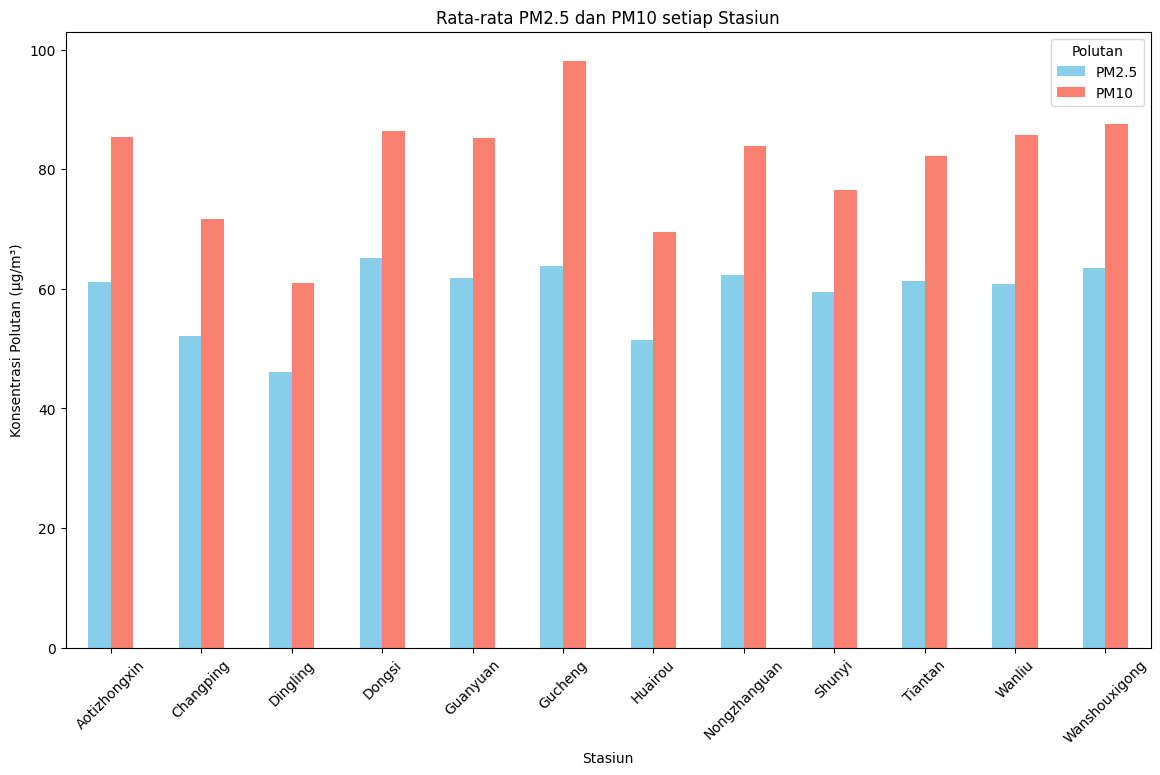

In [223]:
# Rata-rata PM2.5 dan PM10
ratarata_polusi = avg_polution_PM25_PM10[['PM2.5', 'PM10']].xs('mean', axis=1, level=1)

# Bar plot
ratarata_polusi.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'salmon'])
plt.title('Rata-rata PM2.5 dan PM10 setiap Stasiun')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.xlabel('Stasiun')
plt.xticks(rotation=45)
plt.legend(title='Polutan')
plt.show()


### Pertanyaan 2:
Bagaimana distribusi polutan NO2 dalam sehari di setiap stasiun?

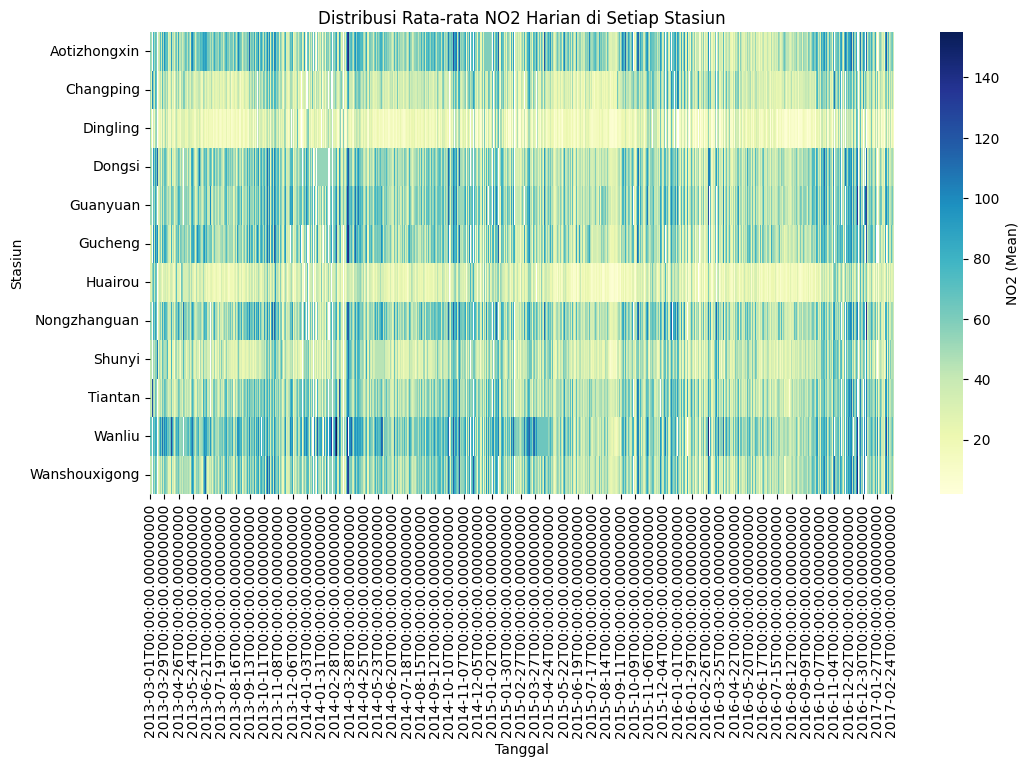

In [224]:
# menentukan rata-rata NO2 harian
datapolutan_heatmap = polutan['NO2'].unstack(level=0).resample('D').mean()

# memviasualisasi menggunakan plot heatmap tren waktu dan stasiun
plt.figure(figsize=(12, 6))
sns.heatmap(datapolutan_heatmap.T, cmap='YlGnBu', cbar_kws={'label': 'NO2 (Mean)'})
plt.title('Distribusi Rata-rata NO2 Harian di Setiap Stasiun')
plt.xlabel('Tanggal')
plt.ylabel('Stasiun')
plt.show()


### Pertanyaan 3:
Bagaimana variabel suhu, hujan, tekanan udara, titik embun dan angin memengaruhi tingkat polusi?

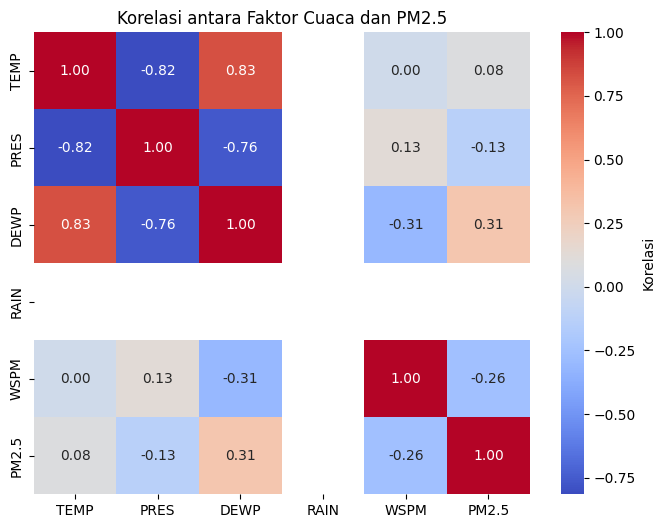

In [225]:
korelasi_ = pengaruh_cuaca[['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM2.5']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(korelasi_, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Korelasi'})
plt.title('Korelasi antara Faktor Cuaca dan PM2.5')
plt.show()


**Insight:**
- Curah hujan tidak mempengaruhi terhadap penurunan atau peningkatan polusi PM2.5 secara langsung tetapi beberapa waktu setelahnya. Curah hujan dan kecepatan angin merupakan faktor penting dalam mengurangi polusi PM2.5 di setiap stasiun. Jadi, wilayah dengan curah hujan tinggi dan kecepatan angin yang kuat akan memiliki kualitas udara yang lebih baik.
- Kelembapan berpengaruh terhadap meningkatnya konsentrasi polutan PM2.5
- Suhu dan tekanan atmosfer bukan faktor utama mempengaruhi konsentrasi PM2.5.
- Berdasarkan nilai rata-rata konsenstasi polutan PM2.5, stasiun Dongsi memiliki konsentrasi polutan tertinggi yaitu 65.16, kedua adalah Gucheng sekitar 63.73 dan ketiga
 Nongzhanguan yaitu 62.23.
- Stasiun Gucheng memiliki nilai rata-rata tertinggi konsentrasi polutan PM10 yaitu 98.07, selanjutnya Dongsi sekitar 86.40 dan Aotizhongxin memiliki nilai 85.30.
- Pada beberapa stasiun tertentu menunjukkan tingkat NO2 yang lebih tinggi secara konsisten ditandai dengan warna hijau gelap misalnya stasiun Tiantan atau Dongsi, bisa jadi bahwa stasiun tersebut lebih sering terpapar polusi.
- Pada stasiun Huairou atau Changping memiliki warna lebih terang maka menunjukkan bahwa konsentrasi NO2 lebih rendah. Jadi, mungkin karena lokasi yang lebih jauh dari area perkotaan.
- Jika warna antar tanggal pada baris tertentu terlihat sangat bervariasi maka menunjukkan polusi harian di stasiun fluktuatif. Sedangkan jika warna cenderung konsisten maka polusi di stasiun tersebut stabil sepanjang waktu.

## Conclusion

- Conclution pertanyaan 1: Beberapa stasiun seperti Dongsi dan Gucheng memiliki tingkat polusi rata-rata dan maksimum yang lebih tinggi dibandingkan stasiun yang lain. Kemungkinan hal ini dipengaruhi faktor seperti aktivitas manusia, lalu lintas, dan kondisi geografis. Jadi, dengan mengurangi sumber polusi tertentu dapat membantu mengurangi konsentrasi polutan PM2.5 dan PM10 bersamaan.
- Conclution pertanyaan 2: Stasiun Huairou dan Changping mungkin berada di pinggiran kota. Stasiun Tiantan dan Dongsi kemungkinan berada di daerah pusat kota atau sumber polusi utama seperti jalan raya dan kawasan industri.
- Conclution pertanyaan 3:
Berdasarkan heatmap bahwa faktor cuaca seperti kelembapan (DEWP), angin (WSPM) memiliki hubungan yang lebih kuat dengan polutan PM2.5, sedangkan faktor lainnya seperti curah hujan (RAIN), tekanan udara (PRES), dan suhu (TEMP) menunjukkan pengaruh yang lemah.





In [226]:
#menyimpan dataset gabungan
save_all_tabeldf = all_tabeldf
save_all_tabeldf.to_csv('all_tabeldf.csv', index=False)